In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

workdir = "D://DrugResponsivenessGuideline_log//Dataset//EDC_EYDC_MDC_regen"

In [2]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario3_EYDC-9K_minmax

dataset = np.load(workdir + "//EYDC9K_dataset.npz") # input file
ss0 = np.load(workdir + '//EYDC9K_dataset_r0_9_1.npz') # split for training and test

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(50,100):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 13


In [6]:
x.shape

(9590, 41505)

In [7]:
training_image_array.shape

(8631, 41505)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
# train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
# test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
# #input_shape = (img_rows, img_cols, 1)

In [10]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8631, 41505) (8631,) (959, 41505) (959,)


In [11]:
inds = np.where(np.isnan(test_X))

In [12]:
inds

(array([], dtype=int64), array([], dtype=int64))

In [13]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (8631, 41505)
8631 train samples
959 test samples


In [14]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Fit regression model
svr_lin = SVR(C=0.01)
y_lin = svr_lin.fit(train_X, train_y).predict(test_X)


In [15]:
import matplotlib
from matplotlib import pyplot as plt

In [16]:
y_lin

array([1.97985079, 1.89737008, 1.93973676, 1.98145723, 1.90558075,
       1.97900079, 1.94128804, 1.97454821, 1.89263725, 1.97966988,
       1.96182023, 1.97063662, 1.97016766, 1.97991595, 1.94828328,
       1.98233587, 1.9700552 , 1.9216128 , 1.93368726, 1.95819582,
       1.93174162, 1.93725754, 1.95003586, 1.97932079, 1.94076771,
       1.97976932, 1.95034374, 1.97913282, 1.98017743, 1.94611991,
       1.8454083 , 1.9793435 , 1.94070718, 1.9844175 , 1.95090523,
       1.93620528, 1.92611831, 1.94833298, 1.97861215, 1.9777806 ,
       1.96001909, 1.97920778, 1.9794604 , 1.98267773, 1.96792791,
       1.84254682, 1.97932808, 1.95094793, 1.95081394, 1.94798149,
       1.98422807, 1.89260024, 1.9792388 , 1.98209202, 1.95877903,
       1.81886582, 1.95672854, 1.90502348, 1.91825811, 1.96729443,
       1.96301162, 1.94779849, 1.97084072, 1.97777445, 1.9734606 ,
       1.94056008, 1.98117848, 1.97933686, 1.90063674, 1.89881316,
       1.92459348, 1.97552114, 1.97391993, 1.95318053, 1.97171

In [17]:
import pickle
from sklearn.externals import joblib
workdir = "D://DrugResponsivenessGuideline_log//Result//EDC_EYDC_MDC_regen//EYDC9K//SVR"
joblib.dump(svr_lin, workdir + '//EYDC9K_SVR_model.pkl') 


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['D://DrugResponsivenessGuideline_log//Result//EDC_EYDC_MDC_regen//EYDC9K//SVR//EYDC9K_SVR_model.pkl']

In [18]:
a = pd.DataFrame(y_lin)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [19]:
c.to_csv(workdir + '//EYDC9K_SVR_pred_obs_table.csv')

In [20]:
c

,Predicted,Test
0,1.979851,2.079442
1,1.897370,2.079442
2,1.939737,-1.507775
3,1.981457,2.079442
4,1.905581,1.111349
...,...,...
954,1.979521,2.079442
955,1.945331,-2.526984
956,1.978786,2.079442
957,1.982353,2.079442


In [21]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.005172721467915895, intercept=1.9538114746253248, rvalue=0.3708264954348598, pvalue=1.250761346992652e-32, stderr=0.00041876350479989785)

In [22]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

-0.28655986485041396


In [23]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 2.2443274183314728


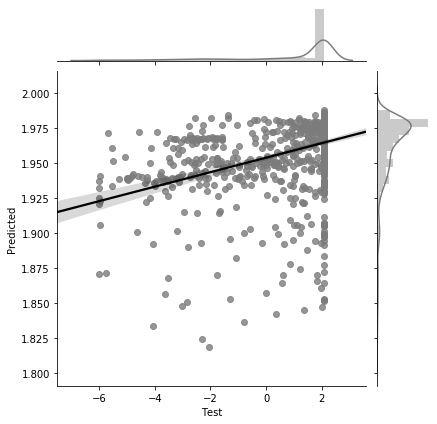

In [24]:
workdir = "D://DrugResponsivenessGuideline_log//Figures//Backbone//EDC_EYDC_MDC_regen//EYDC-9K"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '//EYDC9K_SVR.png', dpi=300)